In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('heart_disease_cleaned.csv')

In [5]:
df.head()

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc = RandomForestClassifier(n_estimators=400)

In [8]:
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop('Target',axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400)

In [42]:
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
from sklearn.metrics import auc

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

In [45]:
predictions = rfc.predict(X_test)

In [49]:
rfc_probs = rfc.predict_proba(X_test)

In [50]:
rfc_probs = rfc_probs[:, 1]

In [51]:
rfc_auc = roc_auc_score(y_test,rfc_probs)

ValueError: multi_class must be in ('ovo', 'ovr')

              precision    recall  f1-score   support

           0       0.70      0.94      0.80        47
           1       0.25      0.11      0.15        19
           2       0.43      0.20      0.27        15
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         0

    accuracy                           0.55        89
   macro avg       0.28      0.25      0.24        89
weighted avg       0.49      0.55      0.50        89



/Users/jonathjd/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


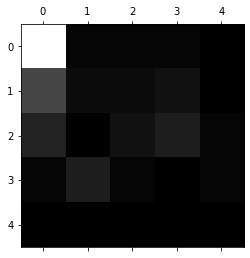

In [52]:
plt.matshow(confusion_matrix(y_test,predictions), cmap = plt.cm.gray)
print(classification_report(y_test,predictions))
# print(confusion_matrix(y_test,predictions))
